## Crime Data Clustering

In [1]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
## Reading the Dataset
crime = pd.read_csv('crime_data.csv')
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
crime.describe()


,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


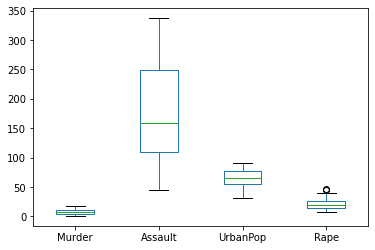

In [5]:
crime.plot(kind = 'box')

In [6]:
## Normalizing the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
crime_subset = pd.DataFrame(scaler.fit_transform(crime.iloc[:, 1:]))
crime_subset.head()

,0,1,2,3
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


In [7]:
## Creating Dendrogram
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage


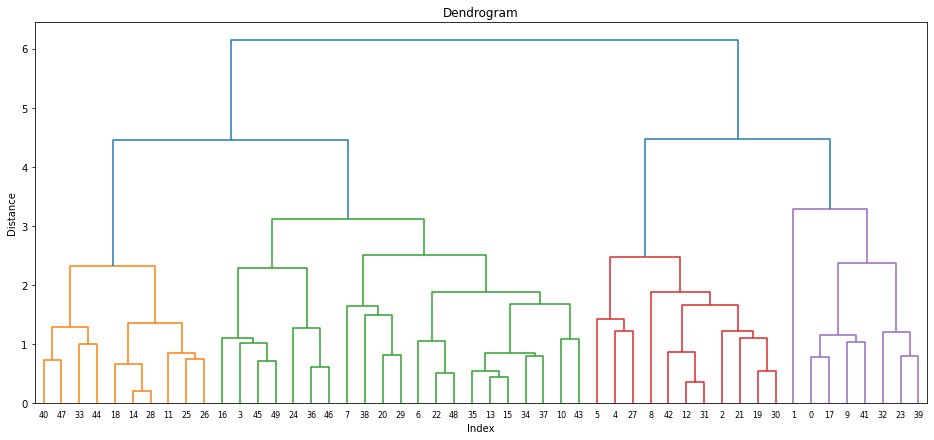

In [25]:
x = linkage(crime_subset, method= 'complete', metric='euclidean')
plt.figure(figsize= (16,7))
plt.title('Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(x,
              leaf_rotation= 0,
               leaf_font_size= 8, 
               show_contracted= True
            )
plt.show()

In [9]:
h_complete = AgglomerativeClustering(n_clusters= 4, linkage= 'complete', affinity= 'euclidean').fit(crime_subset)

Clusters_labels = pd.Series(h_complete.labels_)

crime['Cluster'] = Clusters_labels
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2


In [10]:
crime.groupby(crime.Cluster).mean()

,Murder,Assault,UrbanPop,Rape,Cluster
Cluster,,,,,
0,14.087500,252.750000,53.500000,24.537500,0.0
1,5.871429,134.476190,70.761905,18.580952,1.0
2,11.054545,264.090909,79.090909,32.618182,2.0
3,3.180000,78.700000,49.300000,11.630000,3.0


## K-Mean Clustering

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [12]:
cr_data = pd.read_csv('crime_data.csv')
cr_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [13]:
## Normalizing the data
normalizer = MinMaxScaler()
cr_data_norm = pd.DataFrame(normalizer.fit_transform(cr_data.iloc[:,1:]))
cr_data_norm.head()

,0,1,2,3
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [14]:
## Within Cluster Sum of Squares

wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, random_state = 1)
    kmeans.fit(cr_data_norm)
    wcss.append(kmeans.inertia_)
    
wcss

[13.184122550256447,
 6.596893867946197,
 5.010878493006418,
 3.683456153585914,
 3.2243121375400787,
 2.932812459108817,
 2.5881413623375362,
 2.3199970772762093,
 2.0698570420414026,
 1.877466080815483]

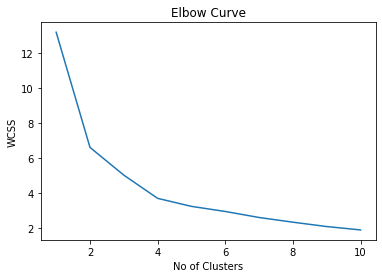

In [15]:
## PLotting Elbow Curve to identify the best K Value

plt.plot(range(1,11), wcss)
plt.title('Elbow Curve')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()


In [28]:
## Getting Optimal K value
from kneed import KneeLocator

y = wcss
x = range(1, len(y)+1)

kn = KneeLocator(x, y, curve= 'convex', direction='decreasing')
print(kn.knee)

4


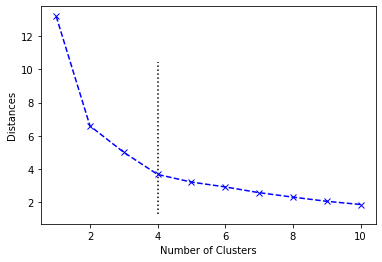

In [27]:
plt.plot(x, y, 'bx--')
plt.xlabel('Number of Clusters')
plt.ylabel('Distances')
plt.vlines(kn.knee, plt.ylim()[0], plt.xlim()[1], linestyles='dotted')
plt.show()

In [16]:
clusters_new = KMeans(4, random_state= 5)
clusters_new.fit(cr_data_norm)


KMeans(n_clusters=4, random_state=5)

In [17]:
clusters_new.labels_

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0])

In [18]:
cr_data['Clusters'] = clusters_new.labels_
cr_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,1


In [19]:
cr_data.groupby('Clusters').mean().round(1).reset_index()

,Clusters,Murder,Assault,UrbanPop,Rape
0,0,5.7,138.9,73.9,18.8
1,1,13.9,243.6,53.8,21.4
2,2,10.8,257.4,76.0,33.2
3,3,3.6,78.5,52.1,12.2


In [20]:
cr_data[cr_data['Clusters']==0].reset_index()

,index,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clusters
0,6,Connecticut,3.3,110,77,11.1,0
1,7,Delaware,5.9,238,72,15.8,0
2,10,Hawaii,5.3,46,83,20.2,0
3,13,Indiana,7.2,113,65,21.0,0
4,15,Kansas,6.0,115,66,18.0,0
5,20,Massachusetts,4.4,149,85,16.3,0
6,29,New Jersey,7.4,159,89,18.8,0
7,34,Ohio,7.3,120,75,21.4,0
8,35,Oklahoma,6.6,151,68,20.0,0
9,36,Oregon,4.9,159,67,29.3,0


In [21]:
cr_data[cr_data['Clusters']==1].reset_index()

,index,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clusters
0,0,Alabama,13.2,236,58,21.2,1
1,3,Arkansas,8.8,190,50,19.5,1
2,9,Georgia,17.4,211,60,25.8,1
3,17,Louisiana,15.4,249,66,22.2,1
4,23,Mississippi,16.1,259,44,17.1,1
5,32,North Carolina,13.0,337,45,16.1,1
6,39,South Carolina,14.4,279,48,22.5,1
7,41,Tennessee,13.2,188,59,26.9,1


In [22]:
cr_data[cr_data['Clusters']==2].reset_index()


,index,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clusters
0,1,Alaska,10.0,263,48,44.5,2
1,2,Arizona,8.1,294,80,31.0,2
2,4,California,9.0,276,91,40.6,2
3,5,Colorado,7.9,204,78,38.7,2
4,8,Florida,15.4,335,80,31.9,2
5,12,Illinois,10.4,249,83,24.0,2
6,19,Maryland,11.3,300,67,27.8,2
7,21,Michigan,12.1,255,74,35.1,2
8,24,Missouri,9.0,178,70,28.2,2
9,27,Nevada,12.2,252,81,46.0,2


In [23]:
cr_data[cr_data['Clusters']==3].reset_index()

,index,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clusters
0,11,Idaho,2.6,120,54,14.2,3
1,14,Iowa,2.2,56,57,11.3,3
2,16,Kentucky,9.7,109,52,16.3,3
3,18,Maine,2.1,83,51,7.8,3
4,22,Minnesota,2.7,72,66,14.9,3
5,25,Montana,6.0,109,53,16.4,3
6,26,Nebraska,4.3,102,62,16.5,3
7,28,New Hampshire,2.1,57,56,9.5,3
8,33,North Dakota,0.8,45,44,7.3,3
9,40,South Dakota,3.8,86,45,12.8,3


## Insights

### Cluster 2 is having the highest Murder rate.

### Cluster 3 is having highest Rape and Assault rate as well.

### Cluster 4 is better place to live when compared to all the clusters, as the crime rate is comparitively less.